# Proposition 64 Analysis - Marijuana Legalization in California

The objective of this document is to analyze spending by committees and individuals toward ballot initiative 64 during the 2016 general election in the state of California. Ballot initiative 64 asked if marijuana should be legalized for recreational use in the state. 

In [13]:
import pandas as pd
%matplotlib inline

At first we read in the list of proposition and committees from the csv. We then we read in the list of contributions from individuals toward committees supporting or opposing ballot measures.

In [14]:
props = pd.read_csv("https://first-python-notebook.readthedocs.io/_static/committees.csv")

In [15]:
contribs = pd.read_csv("https://first-python-notebook.readthedocs.io/_static/contributions.csv")

Here we are isolating proposition 64 from the dataset.

In [16]:
prop = props[props.prop_name == 'PROPOSITION 064- MARIJUANA LEGALIZATION. INITIATIVE STATUTE.']

The aim here is to create a single table that merges data from the props and contribs table. The result is a table that shows to which committees individual donors contributed to and how much that contribution was.

In [17]:
merged = pd.merge(prop, contribs, on="calaccess_committee_id")

Here we isolate persons who are in support of the proposition.

In [18]:
support = merged[merged.committee_position == 'SUPPORT']

Below we will arrange the data to show the top contributors in descending order, format the contributor_fullname field, then run a function to 'clean' the data by combing contributors names that are similar. 

In [19]:
top_supporters = support.groupby(["contributor_firstname", "contributor_lastname"]).amount.sum().reset_index().sort_values("amount", ascending=False)
top_supporters['contributor_fullname'] = top_supporters.contributor_firstname + " " + top_supporters.contributor_lastname

In [20]:
def combine_names(row):
    if row.contributor_fullname.startswith('SEAN PARKER'):
        return 'SEAN PARKER'
    return row.contributor_fullname

In [26]:
top_supporters['contributor_cleanname'] = top_supporters.apply(combine_names, axis=1)
top_supporters.groupby(
    "contributor_cleanname"
).amount.sum().reset_index().sort_values("amount", ascending=False).head(10)

,contributor_cleanname,amount
443,SEAN PARKER,8750000.0
102,DANIEL LEWIS,1250000.0
180,HENRY VAN AMERINGEN,1000000.0
374,NICHOLAS PRITZKER,900000.0
390,PETER THIEL,300000.0
422,ROGER JENKINS,75000.0
22,ANGELA HOWARD,65000.0
297,LAWRENCE HESS,30000.0
505,ZACHARY PYM WILLIAMS,10000.0
421,ROGER B. MCNAMEE,10000.0


Here we create a bar chart showing the top five contributors in favor of the proposition

[Text(0, 0, 'SEAN PARKER'),
 Text(0, 0, 'SEAN PARKER'),
 Text(0, 0, 'DANIEL LEWIS'),
 Text(0, 0, 'HENRY VAN AMERINGEN'),
 Text(0, 0, 'NICHOLAS PRITZKER')]

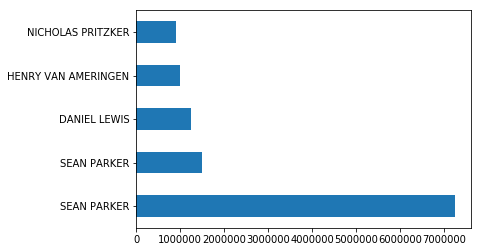

In [25]:
chart = top_supporters.head(5).amount.plot.barh()
chart.set_yticklabels(top_supporters.contributor_cleanname)